# Feature Selection Using LASSO

## Module Import

In [1]:
# Data manipulation
import pandas as pd

# Math
import numpy as np 

# Statistics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold

# Visualization
import matplotlib.pyplot as plt


## Data Preparation

In [ ]:
# Read in data from a CSV file.
data = pd.read_csv('training_data_ht2025.csv')

# Make output numerical.
data["increase_stock_num"] = np.where(data['increase_stock']=='low_bike_demand', -1, 1)
data = data.drop('increase_stock', axis=1)

# Define predictor and response variables.
X = data.drop('increase_stock_num', axis=1).values
y = data['increase_stock_num'].values


## Feature Selection

In [3]:
# Define parameter grid for GridSearchCV.
params = {"alpha":np.arange(0.00001, 10, 500)}

# Create a KFold cross-validation strategy.
kf=KFold(n_splits=5,shuffle=True, random_state=42)

# Initialize the base LASSO model.
lasso = Lasso()

# Set up GridSearchCV to test different alpha values.
lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf)

# Fit the cross-validated model to find the best alpha value.
lasso_cv.fit(X, y)

# Extract the feature names.
features = data.drop('increase_stock_num', axis=1).columns

# Create a LASSO model with the best alpha.
lasso1 = Lasso(alpha=lasso_cv.best_params_["alpha"])

# Fit the LASSO model with the chosen alpha.
lasso1.fit(X, y)

# Extract absolute coefficient values to represent feature importance.
lasso1_coef = np.abs(lasso1.coef_)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.163e+02, tolerance: 7.750e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.280e+02, tolerance: 7.547e-02
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.011e+02, toler

## Result Visualisation

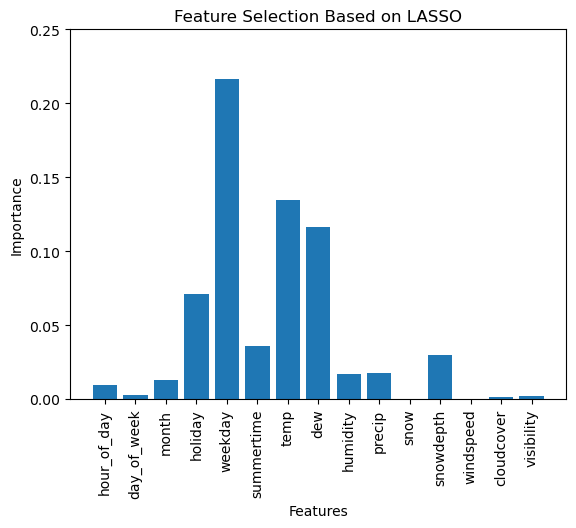

Selected Features:
 - holiday
 - weekday
 - temp
 - dew


In [4]:
# Bar plot to visualize the result
plt.bar(features, lasso1_coef)
plt.xticks(rotation=90)
plt.title("Feature Selection Based on LASSO")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.25)
plt.show()

# Select features with more than 0.05 importance.
feature_subset=np.array(features)[lasso1_coef>0.05]
print('Selected Features:')
for feature in feature_subset:
    print(f' - {feature}')